In [445]:
import pandas as pd
import numpy as np

In [421]:
coffee_df = pd.read_csv('coffee_ratings.csv', encoding='utf-8')

In [422]:
coffee_df.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


We don't need all the columns to analyze the data later on so we will only keep those that are of interest.

In [423]:
cols_to_keep = [
    'total_cup_points',
    'species',
    'country_of_origin',
    'altitude',
    'region',
    'harvest_year',
    'grading_date',
    'variety',
    'aroma',
    'flavor',
    'aftertaste',
    'acidity',
    'body',
    'balance',
    'uniformity',
    'clean_cup',
    'sweetness',
    'cupper_points',
    'moisture',
    'category_one_defects',
    'quakers',
    'category_two_defects',
    'altitude_mean_meters',
    'certification_body'
]

coffee_df = coffee_df[cols_to_keep]
coffee_df.head()

,total_cup_points,species,country_of_origin,altitude,region,harvest_year,grading_date,variety,aroma,flavor,...,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,certification_body
0,90.58,Arabica,Ethiopia,1950-2200,guji-hambela,2014,"April 4th, 2015",NaN,8.67,8.83,...,10.0,10.0,10.0,8.75,0.12,0,0.0,0,2075.0,METAD Agricultural Development plc
1,89.92,Arabica,Ethiopia,1950-2200,guji-hambela,2014,"April 4th, 2015",Other,8.75,8.67,...,10.0,10.0,10.0,8.58,0.12,0,0.0,1,2075.0,METAD Agricultural Development plc
2,89.75,Arabica,Guatemala,1600 - 1800 m,NaN,NaN,"May 31st, 2010",Bourbon,8.42,8.50,...,10.0,10.0,10.0,9.25,0.00,0,0.0,0,1700.0,Specialty Coffee Association
3,89.00,Arabica,Ethiopia,1800-2200,oromia,2014,"March 26th, 2015",NaN,8.17,8.58,...,10.0,10.0,10.0,8.67,0.11,0,0.0,2,2000.0,METAD Agricultural Development plc
4,88.83,Arabica,Ethiopia,1950-2200,guji-hambela,2014,"April 4th, 2015",Other,8.25,8.50,...,10.0,10.0,10.0,8.58,0.12,0,0.0,2,2075.0,METAD Agricultural Development plc


Now look at the data types of each column and see if any of them need to be changed.

In [424]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_cup_points      1339 non-null   float64
 1   species               1339 non-null   object 
 2   country_of_origin     1338 non-null   object 
 3   altitude              1113 non-null   object 
 4   region                1280 non-null   object 
 5   harvest_year          1292 non-null   object 
 6   grading_date          1339 non-null   object 
 7   variety               1113 non-null   object 
 8   aroma                 1339 non-null   float64
 9   flavor                1339 non-null   float64
 10  aftertaste            1339 non-null   float64
 11  acidity               1339 non-null   float64
 12  body                  1339 non-null   float64
 13  balance               1339 non-null   float64
 14  uniformity            1339 non-null   float64
 15  clean_cup            

The altitude column should be of type float64 but it is currently of type object. However, there is a column for the mean altitude so let's look at the altitude values that correspond to missing values in the mean altitude.

In [425]:
coffee_df.loc[coffee_df['altitude_mean_meters'].isnull()]['altitude'].value_counts()

test       1
mmm        1
0          1
huanuco    1
Name: altitude, dtype: int64

In [426]:
coffee_df['harvest_year'].value_counts()

2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
4T/2010                       3
2009-2010                     3
Mayo a Julio                  3
March 2010                    3
Abril - Julio                 2
2011/2012                     2
January 2011                  2
08/09 crop                    2
4t/2010                       1
4T72010                       1
December 2009-March 2010      1
Abril - Julio /2011           1
3T/2011                       1
TEST                          1
May-August                    1
mmm     

We see that the harvest_year column is quite messy. For the values that have a range of years (e.g. 2009-2010 or 2009 / 2010) we will take the first year. For the ones with only the last two digits of the year, we'll extract those two digits and add the '20' on the front later on. Finally, we'll extract the year from those that have letters in them. The rest we will assign an NaN value.

In [427]:
extr = coffee_df['harvest_year'].str.extract(r'^(\d{4})', expand=False)
coffee_df['harvest_year_temp'] = extr

unmatched_years = coffee_df.loc[coffee_df['harvest_year_temp'].isnull()]['harvest_year']
regex_list = [r'(\d{4})$', r'^(\d{2})', r'(\d{2})$', r'(\d{4})']

for rg in regex_list:
    new_matched_years = unmatched_years.str.extract(rg, expand=False)
    coffee_df.loc[coffee_df.index.isin(new_matched_years.index), 'harvest_year_temp'] = new_matched_years
    unmatched_years = coffee_df.loc[coffee_df['harvest_year_temp'].isnull()]['harvest_year']
    
unmatched_years = coffee_df.loc[coffee_df['harvest_year_temp'].isnull()]['harvest_year']
unmatched_years[~unmatched_years.isnull()]

16                May-August
169                      mmm
170                     TEST
395    January Through April
477       August to December
492             Mayo a Julio
527            Abril - Julio
814             Mayo a Julio
869             Mayo a Julio
932            Abril - Julio
Name: harvest_year, dtype: object

We see that the only ones that were left are those that don't have a year value. Now let's modify the few entries that need the '20' at the front.

In [428]:
full_years = '20' + coffee_df.loc[coffee_df['harvest_year_temp'].str.len() == 2]['harvest_year_temp']
coffee_df.loc[coffee_df['harvest_year_temp'].str.len() == 2, 'harvest_year_temp'] = full_years

In [429]:
coffee_df['harvest_year_temp'].value_counts()

2012    354
2014    252
2013    210
2015    157
2016    131
2017     89
2011     36
2010     32
2009     18
2008      2
2018      1
Name: harvest_year_temp, dtype: int64

Now that we have successfully cleaned the data for this column, let's replace the column with the temporary one we created.

In [430]:
coffee_df.drop('harvest_year', axis=1, inplace=True)
coffee_df.rename(columns={'harvest_year_temp': 'harvest_year'}, inplace=True)

Let's now look at which columns have missing values and see how we can deal with them.

In [431]:
pd.Series(coffee_df.columns[coffee_df.isnull().any()])

0       country_of_origin
1                altitude
2                  region
3                 variety
4                 quakers
5    altitude_mean_meters
6            harvest_year
dtype: object

Let's look at how many missing values are in each of the above columns.

In [432]:
missing_vals = coffee_df.isna().sum()
missing_vals[missing_vals != 0]

country_of_origin         1
altitude                226
region                   59
variety                 226
quakers                   1
altitude_mean_meters    230
harvest_year             57
dtype: int64

Each of country_of_origin and quakers have one missing value, so we'll remove these rows from the table.

In [433]:
coffee_df = coffee_df.loc[
    (~coffee_df['country_of_origin'].isnull()) |
    (~coffee_df['quakers'].isnull())
]

There are a few missing values in the region column. However, we will keep these rows since they still contain information about the coffee. If we decide to do an analysis of the regions within each country with the best coffee, we'll have to ignore these rows. In fact, let's see if that analysis is worth doing by counting the number of unique regions per country.

In [434]:
coffee_df.groupby('country_of_origin')['region'].nunique()

country_of_origin
Brazil                          21
Burundi                          2
China                            4
Colombia                        16
Costa Rica                      13
Cote d?Ivoire                    1
Ecuador                          2
El Salvador                      6
Ethiopia                        15
Guatemala                       22
Haiti                            5
Honduras                        12
India                            5
Indonesia                       16
Japan                            1
Kenya                            8
Laos                             2
Malawi                           3
Mauritius                        1
Mexico                          91
Myanmar                          6
Nicaragua                        5
Panama                           1
Papua New Guinea                 1
Peru                             6
Philippines                      5
Rwanda                           1
Taiwan                          31
Ta

There are countries with multiple regions so maybe it's best we don't get rid of the region column just yet.

There are multiple missing values in the variety column so we'll have to look further into it and figure out a way to deal with them.

In [435]:
coffee_df.loc[coffee_df['variety'].isnull()]['region'].value_counts()

kona                                                                       21
huila                                                                      19
thailand                                                                   10
sidamo                                                                      9
cauca                                                                       9
                                                                           ..
puno                                                                        1
apaneca                                                                     1
marmelade                                                                   1
52 narino (exact location: mattituy; municipal region: florida code 381     1
sheema south western                                                        1
Name: region, Length: 69, dtype: int64

We see that there are multiple rows with missing values for the variety column. We will replace these values with the most common variety in their corresponding regions.

In [436]:
variety_modes = coffee_df.loc[~coffee_df['variety'].isnull()].groupby('region')[['variety']].apply(lambda x: x.mode().iloc[0])
missing_varieties = coffee_df.loc[(coffee_df['variety'].isnull()) & (~coffee_df['region'].isnull())][['region']]

In [437]:
missing_varieties = missing_varieties.reset_index().merge(variety_modes, on='region', how='inner').set_index('index')
missing_varieties = missing_varieties.loc[~missing_varieties['variety'].isnull()]
coffee_df.loc[coffee_df.index.isin(missing_varieties.index), 'variety'] = missing_varieties['variety']

Now for the rows that have a missing region and missing variety, we'll set the variety to the most common variety in the country.

In [438]:
variety_modes = coffee_df.loc[
    ~coffee_df['variety'].isnull()
].groupby('country_of_origin')[['variety']].apply(lambda x: x.mode().iloc[0])

missing_varieties = coffee_df.loc[
    (coffee_df['variety'].isnull()) & (~coffee_df['country_of_origin'].isnull())
][['country_of_origin']]

missing_varieties = missing_varieties.reset_index().merge(variety_modes, on='country_of_origin', how='inner').set_index('index')
missing_varieties = missing_varieties.loc[~missing_varieties['variety'].isnull()]
coffee_df.loc[coffee_df.index.isin(missing_varieties.index), 'variety'] = missing_varieties['variety']

In [439]:
print('Number of missing values in the "variety" column:', coffee_df.loc[coffee_df['variety'].isnull()].shape[0])

Number of missing values in the "variety" column: 7


Since now there are only six rows with a missing value for the variety column, we will get rid of these.

In [440]:
coffee_df = coffee_df.loc[~coffee_df['variety'].isnull()]

Now let's look at the missing values in the mean altitude column and see if we can replace them with their value in the altitude column. To do so, let's look at the rows with a non-missing altitude value that have a missing mean altitude value.

In [442]:
missing_mean_alt = coffee_df.loc[coffee_df['altitude_mean_meters'].isnull()]
missing_mean_alt[~missing_mean_alt['altitude'].isnull()]

,total_cup_points,species,country_of_origin,altitude,region,grading_date,variety,aroma,flavor,aftertaste,...,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,certification_body,harvest_year
169,84.50,Arabica,Brazil,mmm,mmm,"March 23rd, 2011",Bourbon,7.81,7.81,7.88,...,10.0,10.0,8.13,0.00,0,0.0,4,NaN,NUCOFFEE,NaN
170,84.50,Arabica,Brazil,test,test,"March 22nd, 2011",Bourbon,8.17,7.67,7.75,...,10.0,10.0,7.75,0.00,2,0.0,0,NaN,NUCOFFEE,NaN
687,82.42,Arabica,Peru,huanuco,peru,"January 21st, 2014",Caturra,7.58,7.58,7.58,...,10.0,10.0,7.50,0.00,0,0.0,3,NaN,Specialty Coffee Association,2013
986,81.08,Arabica,Ethiopia,0,sidamo,"July 14th, 2017",Gesha,7.42,7.33,7.17,...,10.0,10.0,7.25,0.11,0,0.0,1,NaN,Specialty Coffee Institute of Asia,2016


There are only four rows like this, and they all have invalid values for the altitude. We'll have to figure out another way to deal with missing values for the mean altitude. If two different coffees are grown in the same region, it's plausible that they are grown at similar altitudes and we could use this information to replace some of the missing values. To see if this makes sense, let's look at the standard deviation of mean altitude by region for the regions that don't have a missing mean altitude.

In [469]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

mean_alt_std = coffee_df.loc[~coffee_df['altitude_mean_meters'].isnull()].groupby('region')[['altitude_mean_meters']].std()
mean_alt_std = mean_alt_std.loc[
    (~mean_alt_std['altitude_mean_meters'].isnull()) &
    (mean_alt_std.index.isin(missing_mean_alt['region'].unique()))
]
mean_alt_std

,altitude_mean_meters
region,
antigua,29.18429
arusha,131.81426
cauca,170.83352
central valley,48.79500
cerrado,3526.18962
eastern uganda,35.35534
grama valley,50.00000
guayata,57.73503
huila,502.01676


Looking at the table above we see that there are some regions with a very large standard deviation. Given this new information, let's look at the standard deviation of all regions across the whole data set and determine which ones have values that are skewing the distribution.

In [476]:
region_alt_std = coffee_df.groupby('region')[['altitude_mean_meters']].std()
region_alt_std = region_alt_std[
    (~region_alt_std['altitude_mean_meters'].isnull()) &
    (region_alt_std['altitude_mean_meters'] != 0)
].sort_values('altitude_mean_meters', ascending=False)
region_alt_std

,altitude_mean_meters
region,
huehuetenango,47159.28856
jinotega,31436.59404
oriente,23247.85481
cerrado,3526.18962
amatenango de la frontera,1122.88557
...,...
central region,28.86751
"el balsamo, quezaltepec",28.86751
vale da grama,23.93568


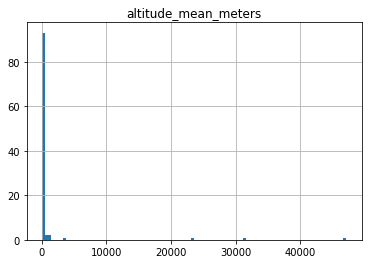

In [480]:
region_alt_std.hist(bins=100);

Looking at the distribution of standard deviations, we'll choose an "error" margin of 500 meters. The reason I call it an "error" is not because it actually is an error but rather because some regions can be very large in size and elevation can vary vastly within the same region (e.g. Yunnan in China). We'll only check for unreasonable values of altitude for regions with a standard deviation higher than 500 meters.

In [491]:
region_alt_std = region_alt_std.loc[region_alt_std['altitude_mean_meters'] > 500]

In [492]:
coffee_df.loc[
    (coffee_df['region'].isin(region_alt_std.index)) & 
    (~coffee_df['altitude_mean_meters'].isnull())
].groupby('region')[['altitude_mean_meters']].describe()

altitude_mean_meters                          \
                                         count        mean         std   
region                                                                   
amatenango de la frontera              2.00000   806.00000  1122.88557   
cerrado                                8.00000  2275.87500  3526.18962   
chikmagalur                            9.00000  1305.55556   966.45113   
huehuetenango                         16.00000 13319.16320 47159.28856   
huila                                 94.00000  1539.15957   502.01676   
jinotega                              12.00000 10176.04167 31436.59404   
oriente                               66.00000  4166.41464 23247.85481   
sul de minas                           4.00000   956.25000   554.66769   

                                                                       \
                                 min        25%        50%        75%   
region                                                                  
amatenango de la frontera   12.00000  409.00000  806.00000 1203.00000   
cerrado                    900.00000  967.75000 1075.00000 1112.50000   
chikmagalur                750.00000  750.00000  750.00000 1000.00000   
huehuetenango             1099.41360 1377.01020 1688.20000 1712.97600   
huila                      165.00000 1700.00000 1750.00000 1775.00000   
jinotega                   925.00000 1000.00000 1100.00000 1250.00000   
oriente                    157.88640 1219.20000 1310.64000 1310.64000   
sul de minas               125.00000  931.25000 1225.00000 1250.00000   

                                        
                                   max  
region                                  
amatenango de la frontera   1600.00000  
cerrado                    11000.00000  
chikmagalur                 3000.00000  
huehuetenango             190164.00000  
huila                       1900.00000  
jinotega                  110000.00000  
oriente                   190164.00000  
sul de minas                1250.00000

We see that the first region has a minimum elevation of 12 meters. Let's look at the other elevations in this region.

In [500]:
def show_region(region, cols_to_show):
    return coffee_df.loc[coffee_df['region'] == region][cols_to_show]

In [502]:
show_region('amatenango de la frontera', ['altitude_mean_meters'])

,altitude_mean_meters
924,1600.00000
1203,927.00000


Looking up the data for this region, the median altitude is 927m while the min. and max. are 600m and 2400m, respectively. We will replace the altitude for the second entry with the median altitude for the region.

In [496]:
coffee_df.loc[1203, 'altitude_mean_meters'] = 927

The second region has a maximum value that doesn't make sense, so let's look at it.

In [503]:
show_region('cerrado', ['country_of_origin', 'altitude_mean_meters'])

,country_of_origin,altitude_mean_meters
218,Brazil,1150.00000
543,Brazil,11000.00000
566,Brazil,900.00000
706,Brazil,982.00000
707,Brazil,nan
765,Brazil,nan
810,Brazil,1050.00000
856,Brazil,925.00000
936,Brazil,1100.00000
953,Brazil,1100.00000


The entry with index 543 has a mean altitude value that is not possible anywhere in the world. Therefore, we'll replace it with the mean of the other values.